In [2]:
%matplotlib inline 
import matplotlib.pylab
import numpy as np
import pandas as pd

In [1]:
# Window functions are like aggregation functions
# You can use them in conjunction with .resample() which is also a deferred operation

## Shifting Operation

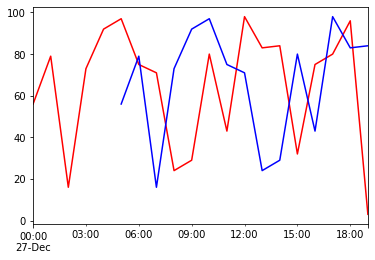

In [7]:
ts = pd.Series(np.random.randint(0,100,20), index=pd.date_range('2020-12-27', periods=20, freq='H'))
ts_shifted = ts.shift(5)
ts.plot(color='red')
ts_shifted.plot(color='blue')
ts.t

## Window function

`rolling` gives you moving aggregate measures of time series

In [8]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('7/1/2016', freq = 'S', periods = 600), columns = ['A', 'B', 'C'])

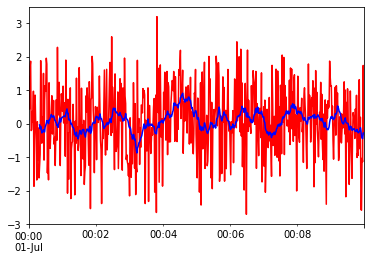

In [20]:
#pd.rolling_mean(df, window = 2)[1:10] # in future versions you want to resample separately
r = df.rolling(window = 20)
#r.agg, r.apply, r.count, r.exclusions, r.max, r.median, r.name, r.quantile, r.kurt, r.cov, r.corr, r.aggregate, r.std, r.skew, r.sum, r.var
df['A'].plot(color='red')
r.mean()['A'].plot(color='blue')

In [23]:
# A couple of aggregations available
# r.count, r.agg, r.max, r.min, r.apply, r.median, r.name, r.quantile, r.kurt, r.aggregate, r.std, r.skew, r.sum, r.var
r['A'].agg(['count', 'var', 'std'])

,count,var,std
2016-07-01 00:00:00,1.0,NaN,NaN
2016-07-01 00:00:01,2.0,NaN,NaN
2016-07-01 00:00:02,3.0,NaN,NaN
2016-07-01 00:00:03,4.0,NaN,NaN
2016-07-01 00:00:04,5.0,NaN,NaN
...,...,...,...
2016-07-01 00:09:55,20.0,1.110802,1.053946
2016-07-01 00:09:56,20.0,1.125446,1.060870
2016-07-01 00:09:57,20.0,1.144923,1.070011
2016-07-01 00:09:58,20.0,1.293090,1.137141


In [26]:
r['A'].apply(lambda x: x.max()-x.min())

2016-07-01 00:00:00         NaN
2016-07-01 00:00:01         NaN
2016-07-01 00:00:02         NaN
2016-07-01 00:00:03         NaN
2016-07-01 00:00:04         NaN
                         ...   
2016-07-01 00:09:55    3.904408
2016-07-01 00:09:56    3.904408
2016-07-01 00:09:57    3.904408
2016-07-01 00:09:58    4.327876
2016-07-01 00:09:59    4.327876
Freq: S, Name: A, Length: 600, dtype: float64

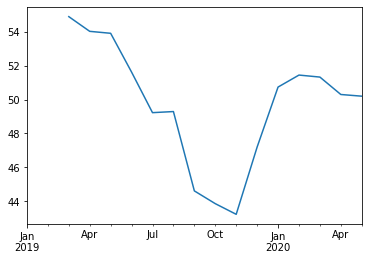

In [31]:
# Generate a rolling window function of monthly data from daily data
ts_daily = pd.Series(np.random.randint(0,100, 500), index = pd.date_range('2019-01-01', periods = 500, freq='D'))
ts_daily.resample('M').mean().rolling(window=3).mean().plot()

## Expanding window
Rolling window starting from the beginning fo the time series

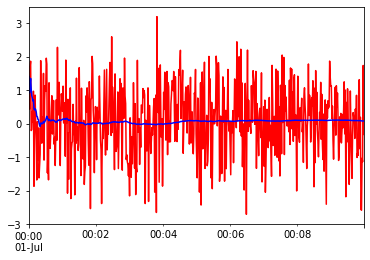

In [36]:
 df['A'].plot(color='red')
 df['A'].expanding(min_periods=1).mean().plot(color='blue')

In [ ]:
# When would you use expanding window versus rolling window?
# Things back in time still count a lot. Has some non markov features

## Other functions

In [39]:
#exponentially weighted
df['A'].ewm(span = 15, min_periods = 2).mean()

2016-07-01 00:00:00         NaN
2016-07-01 00:00:01    0.891220
2016-07-01 00:00:02    1.199660
2016-07-01 00:00:03    1.402188
2016-07-01 00:00:04    0.990226
                         ...   
2016-07-01 00:09:55   -0.627902
2016-07-01 00:09:56   -0.678006
2016-07-01 00:09:57   -0.735311
2016-07-01 00:09:58   -0.425482
2016-07-01 00:09:59   -0.411830
Freq: S, Name: A, Length: 600, dtype: float64

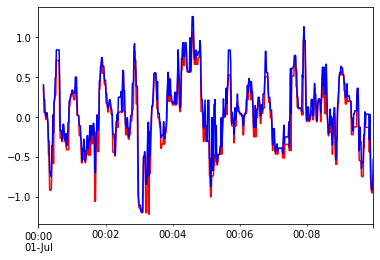

In [59]:
# Implement quantile function with custom lambda

def custom_quantile(x, quantile):
  sorted_x = sorted(x)
  if len(x) % 2 == 0:
    return sorted_x[int(quantile * (len(x)-1))]
  return np.average(sorted_x[int(quantile * (len(x)-1)): int(quantile * (len(x)-1))+2])

df['A'].rolling(window=10).apply(lambda x: custom_quantile(x, 0.5)).plot(color='red')
df['A'].rolling(window=10).quantile(.5).plot(color='blue')

In [64]:
# How can you run multiple aggregation on one rolling window
df['A'].rolling(window=10).agg(['sum', 'count'])

,sum,count
2016-07-01 00:00:00,NaN,1.0
2016-07-01 00:00:01,NaN,2.0
2016-07-01 00:00:02,NaN,3.0
2016-07-01 00:00:03,NaN,4.0
2016-07-01 00:00:04,NaN,5.0
...,...,...
2016-07-01 00:09:55,-5.354684,10.0
2016-07-01 00:09:56,-7.234364,10.0
2016-07-01 00:09:57,-7.363221,10.0
2016-07-01 00:09:58,-4.744090,10.0
